# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



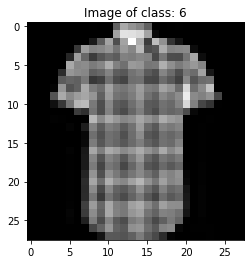

In [ ]:
# Lest read a random image from the dataset and draw it
image, label = training_data[72]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [ ]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [ ]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [ ]:
train_Dataloader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle= True )
test_Dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle= True )

# Task 2:

Create a Neural Network

In [ ]:
inp_size = 784
hidden_sizes = [256, 128, 64]
out_size = 10

NNmodel = nn.Sequential(nn.Linear(inp_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[2], out_size),
                     nn.LogSoftmax(dim=1))
print(NNmodel)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


# Task 3:

Specify loss and optimizer

In [ ]:
loss_criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(NNmodel.parameters(), lr=0.001, momentum=0.9)

# Task 3:

Train model using for loop

In [ ]:

device = torch.device('cpu')
EPOCHS  = 20
for epoch in range(EPOCHS):
    run_loss = 0
    for batch, (X, y) in enumerate(train_Dataloader):
        X, y = X.to(device), y.to(device)
       
        pred = NNmodel(X.view(X.shape[0], -1))
        loss = loss_criterion(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
    print(f"Epoch {epoch + 1}\n Training loss: {run_loss/len(train_Dataloader)}") 

Epoch 1
 Training loss: 1.3567937800566356
Epoch 2
 Training loss: 0.6414367929061254
Epoch 3
 Training loss: 0.5279106037378312
Epoch 4
 Training loss: 0.4804610716064771
Epoch 5
 Training loss: 0.44908044495979943
Epoch 6
 Training loss: 0.4264567210038503
Epoch 7
 Training loss: 0.4069379526615143
Epoch 8
 Training loss: 0.38898341461022695
Epoch 9
 Training loss: 0.37162339704831443
Epoch 10
 Training loss: 0.35766709118088086
Epoch 11
 Training loss: 0.345860265737772
Epoch 12
 Training loss: 0.33538554820219674
Epoch 13
 Training loss: 0.32602232231299083
Epoch 14
 Training loss: 0.3155663549145063
Epoch 15
 Training loss: 0.3075931452691555
Epoch 16
 Training loss: 0.2990505782087644
Epoch 17
 Training loss: 0.2944360342999299
Epoch 18
 Training loss: 0.285759976246953
Epoch 19
 Training loss: 0.27870471374789874
Epoch 20
 Training loss: 0.2727531650940577


# Task 4:

Report accuracy from train set, and test set independently

In [ ]:
def accuracy(loader, mod):
  correct_counts = 0
  all_counts = 0
  preds = torch.tensor([])
  true_vals = torch.tensor([])
  for x, y in loader:
    true_vals = torch.cat((true_vals, y), 0)
    for i in range(len(y)):
      img = x[i].view(1, 784)
      with torch.no_grad():
          logps = mod(img)
      ps = torch.exp(logps)
      _, pred_label = torch.max(ps, dim = 1)
      preds = torch.cat((preds, pred_label), 0)
      true_label = y[i]
      if(true_label == pred_label.item()):
        correct_counts += 1
      all_counts += 1

  return all_counts, correct_counts/all_counts, preds, true_vals

train_count, acc_train, train_preds, train_true_val = accuracy(train_Dataloader, NNmodel)
print(f"Number Of Images Train: {train_count}, \n Accuracy(train dataset): {acc_train} \n")
test_count, acc_test, test_preds, test_true_val = accuracy(test_Dataloader, NNmodel)
print(f"Number Of Images Test: {test_count}, \n Accuracy(test dataset): {acc_test}\n")

Number Of Images Train: 60000, 
 Accuracy(train dataset): 0.8972333333333333 

Number Of Images Test: 10000, 
 Accuracy(test dataset): 0.8718



# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_true_val, test_preds)
print(f'Confussion matrix: \n {conf_matrix}')

Confussion matrix: 
 [[833   1  26  24   1   2 106   0   7   0]
 [  5 963   0  24   4   0   2   0   2   0]
 [ 14   0 880  14  34   0  52   0   6   0]
 [ 21   5  19 883  36   0  31   0   5   0]
 [  0   0 228  24 634   0 111   0   3   0]
 [  0   0   0   1   0 978   0  10   1  10]
 [117   2 118  20  35   0 691   0  17   0]
 [  0   0   0   0   0  37   0 926   1  36]
 [  5   0   6   6   1   3   5   3 971   0]
 [  0   0   0   0   0  12   0  28   1 959]]


In [ ]:
def view_classify(img, ps):
    
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    

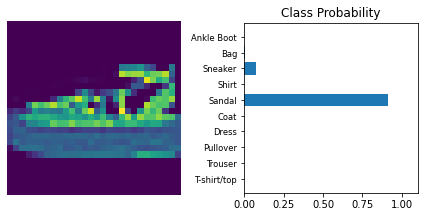

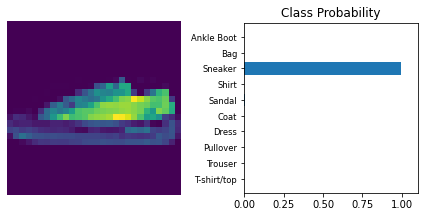

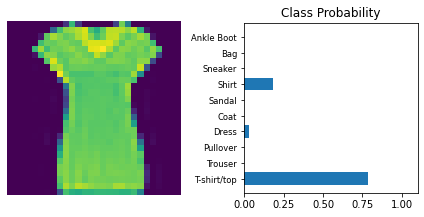

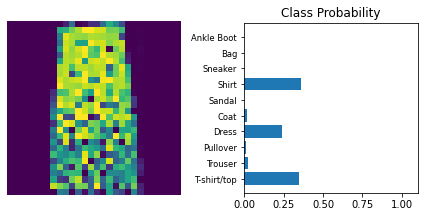

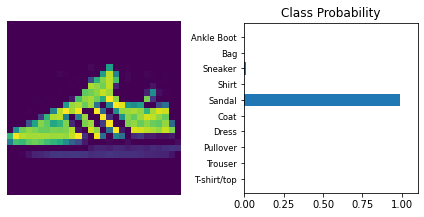

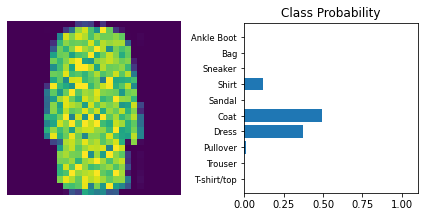

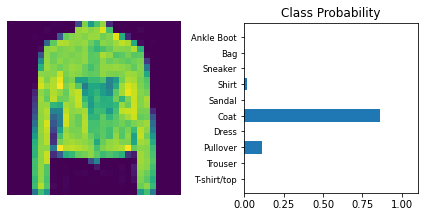

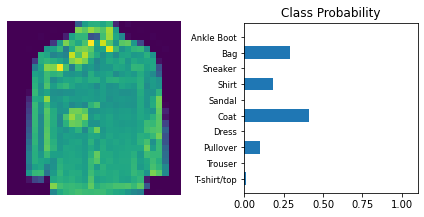

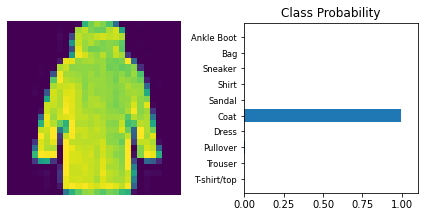

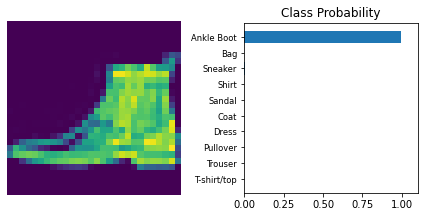

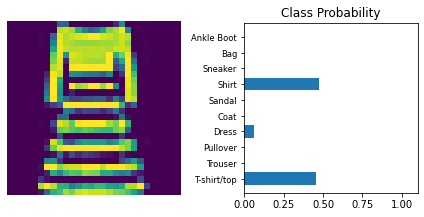

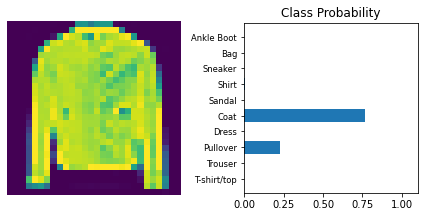

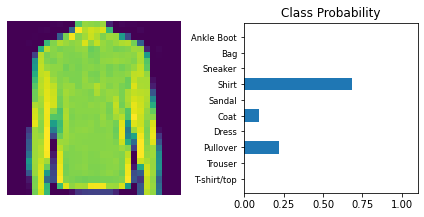

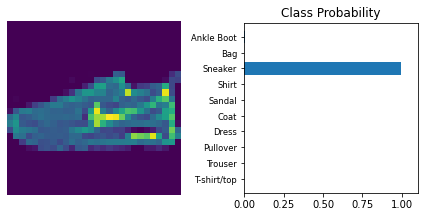

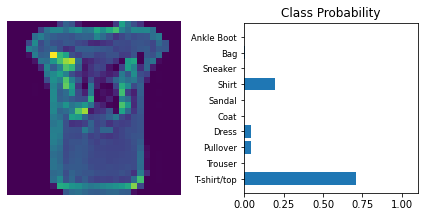

In [ ]:
dataiter=iter(test_Dataloader)

for i in range(15):
    images, labels = dataiter.next()
    img = images[0]
    img = img.resize_(1, 784)
    ps = torch.exp(NNmodel(img))

    view_classify(img, ps)

# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN